<a href="https://colab.research.google.com/github/mendiang/Google-Bangkit-Final-Project/blob/master/Coin_Prediction_using_Keras_CNN_MobileNet_V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imammukhri","key":"d553f330ce99d44335d217a5a8d739d5"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Jun 17 14:42 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wanderdust/coin-images

100% 457M/459M [00:03<00:00, 131MB/s]
100% 459M/459M [00:03<00:00, 139MB/s]


In [ ]:
!unzip /content/coin-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: coins/data/train/172/020__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/021__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/022__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/023__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/024__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/025__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/026__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/027__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/028__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/029__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/030__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/031__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/033__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/035__50 Ore_sweden.jpg  
  inflating: coins/data/train/172/036__50 Ore_sweden.jpg  
  inflating: coins/data/train/173/002__1 Krona_sweden.jpg  
  in

Load Library

In [ ]:
import numpy as np # linear algebra
import os
from time import time
from keras.preprocessing.image import ImageDataGenerator, img_to_array, image
from keras.utils import np_utils
import json
from PIL import Image
import os
import tensorflow as tf

Using TensorFlow backend.


Specify location of our data

In [ ]:
data_dir = "/content/coins/data"

data_train_path =  data_dir + '/train'
data_valid_path = data_dir + '/validation'
data_test_path =  data_dir + '/test'

print(os.listdir("/content/coins/data"))


['train', 'test', 'cat_to_name.json', 'validation']


Load the json that maps the folder number to the coin name

In [ ]:
with open('/content/coins/data/cat_to_name.json', 'r') as json_file:
    cat_2_name = json.load(json_file)

print(cat_2_name['200'])

1 Kurus,Turkish Lira,turkey


Create generators to apply transformations to the images during training

In [ ]:
batch_size=60

# Transforms
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

datagen_valid = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

datagen_test = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rescale=1./255)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Load the data using the generators

In [ ]:
train_generator = datagen_train.flow_from_directory(
        data_train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = datagen_valid.flow_from_directory(
        data_valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = datagen_test.flow_from_directory(
        data_test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 6413 images belonging to 211 classes.
Found 844 images belonging to 211 classes.
Found 844 images belonging to 211 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow

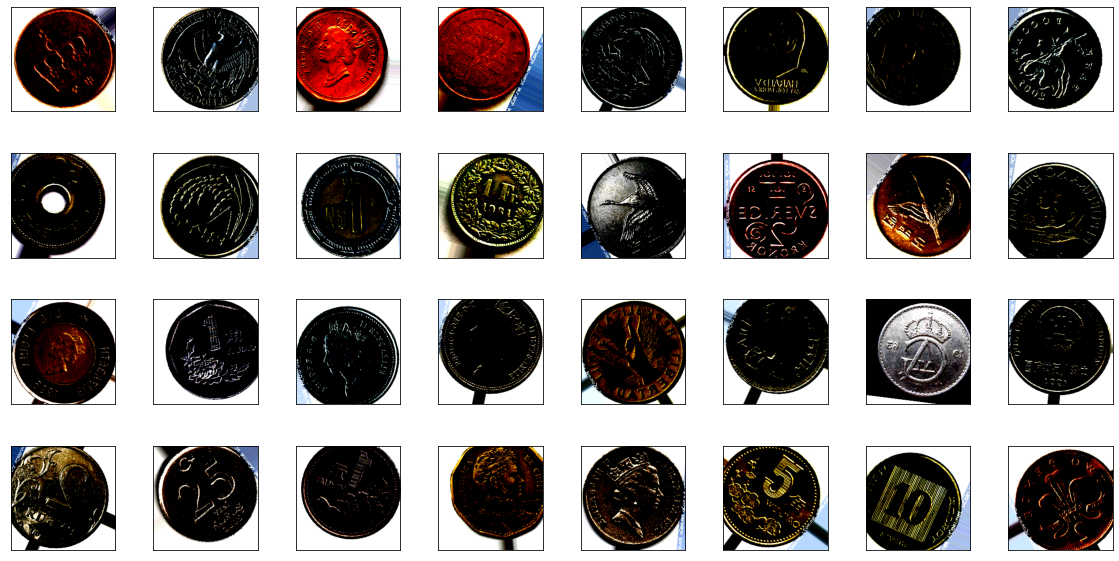

In [ ]:
import matplotlib.pyplot as plt


# Lets have a look at some of our images
images, labels = train_generator.next()

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.2, hspace=0.4)

# Lets show the first 32 images of a batch
for i, img in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    image_idx = np.argmax(labels[i])

Keras maps each folder (class) to a number. Create a dictionary that maps the number assigned by keras to our folder real number

In [ ]:
int_to_dir = {v: k for k, v in train_generator.class_indices.items()}

Create the model using a pre-trained MobileNetV2. I add only the fully connected layers at the end.

In [ ]:
from keras.applications import MobileNetV2
from keras.layers import Dense, Input, Dropout
from keras.models import Model


input_tensor = Input(shape=(224, 224, 3))
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')

for layer in base_model.layers:
    layer.trainable = True  # trainable has to be false in order to freeze the layers

x = Dense(512, activation='relu')(base_model.output)
x = Dropout(.8)(x)

predictions = Dense(211, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

9412608/9406464 [==============================] - 1s 0us/step


Specify the optimizer

In [ ]:
from keras.optimizers import Adam

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

Specify how I want to train the model and train the model. How to save the model, when to stop training etc.

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

num_train = len(train_generator.filenames)
num_valid = len(valid_generator.filenames)
num_test = len(train_generator.filenames)


# When to save the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

# Reduce learning rate when loss doesn't improve after n epochs
scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=1e-8, verbose=1)

# Stop early if model doesn't improve after n epochs
early_stopper = EarlyStopping(monitor='val_loss', patience=12,
                              verbose=0, restore_best_weights=True)

# Train the model
history = model.fit_generator(train_generator,
                    steps_per_epoch=num_train//batch_size,
                    epochs=100,
                    verbose=1,
                    callbacks=[checkpointer, scheduler, early_stopper],
                    validation_data=valid_generator,
                    validation_steps=num_valid//batch_size)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


106/106 [==============================] - 128s 1s/step - loss: 5.5296 - accuracy: 0.0079 - val_loss: 5.3139 - val_accuracy: 0.0179

Epoch 00001: val_loss improved from inf to 5.31387, saving model to model.weights.best.hdf5
Epoch 2/100
106/106 [==============================] - 114s 1s/step - loss: 5.2057 - accuracy: 0.0282 - val_loss: 5.1992 - val_accuracy: 0.0268

Epoch 00002: val_loss improved from 5.31387 to 5.19920, saving model to model.weights.best.hdf5
Epoch 3/100
106/106 [==============================] - 113s 1s/step - loss: 4.9568 - accuracy: 0.0658 - val_loss: 4.8334 - val_accuracy: 0.0625

Epoch 00003: val_loss improved from 5.19920 to 4.83344, saving model to model.weights.best.hdf5
Epoch 4/100
106/106 [==============================] - 113s 1s/step - loss: 4.5473 - accuracy: 0.1324 - val_loss: 4.4731 - val_accuracy: 0.1097

Epoch 00004: val_loss improved from 4.83344 to 4.47308, saving model to model.weights.best.hdf5
Epoch 5/100
106/106 [==============================]

Load our saved model with the best scores

In [ ]:
model.save('mobilenet.h5')

Evaluate our model

In [ ]:
score = model.evaluate_generator(test_generator, steps=num_test//1, verbose=1)
print('\n', 'Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


6413/6413 [==============================] - 1826s 285ms/step

 Test accuracy: 0.812784731388092


Normalizer

In [ ]:
def normalizer(img):
    img_expand = np.expand_dims(img, axis=0)

    generator = ImageDataGenerator(
        featurewise_std_normalization=True,
        samplewise_std_normalization=True,
        rescale=1./255)
    image_flow = generator.flow(
        img_expand,
        y=None,
        batch_size=1
    )
    
    return image_flow.next()

Sanity check to make sure nothing crazy is happening

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Predicted: 1 Real,Brazilian Real,brazil
Real:      1 Real,Brazilian Real,brazil

Predicted: 50 Cents,New Zealand dollar,new_zealand
Real:      50 Cents,New Zealand dollar,new_zealand

Predicted: 10 Dollars,taiwan Dollar,taiwan
Real:      1 Dollar,taiwan Dollar,taiwan

Predicted: 100 Yen,Japanese Yen,japan
Real:      100 Yen,Japanese Yen,japan

Predicted: 500 Rupiah,Indonesian Rupiah,indonesia
Real:      500 Rupiah,Indonesian Rupiah,indonesia

Predicted: 2 Dollars,Canadian Dollar,canada
Real:      2 Dollars,Canadian Dollar,canada

Predicted: 1 Jiao,Chinese Yuan Renminbi,china
Real:      1 Jiao,Chinese Yuan Renminbi,china

Predicted: 2 Dollars,Australian dollar,australia
Real:      2 Dollars,Australian dollar,australia

Predicted: 2 Dollars,Canadian Dollar,canada
Real:      2 Dollars,Canadian Dollar,canada

Predicted: 50 Cents,Canadian Dollar,canada
Real:      50 Cents,Canadian Dollar,canada



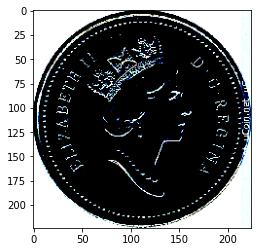

In [ ]:
def get_prediction(img, real_label):
    img = image.img_to_array(img)/255
    
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = (img - mean)/std
    
    img_expand = np.expand_dims(img, axis=0)

    prediction = model.predict(img_expand)
    prediction_int = np.argmax(prediction)

    dir_int = int_to_dir[prediction_int]
    label_name = cat_2_name[str(dir_int)]
    
    plt.imshow(img)
    
    print("Predicted: {}\nReal:      {}".format(label_name, cat_2_name[str(real_label)]))
    print()

for i in range(10):
    random_index = np.random.randint(0, len(test_generator.filenames))
    
    img = test_generator.filenames[random_index]
    img = image.load_img("/content/coins/data/test/"+img, target_size=(224,224))
    real_label = test_generator.filenames[random_index].split("/")[0]

    get_prediction(img, real_label)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
print("GPU", "available (YESS!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!)


In [ ]:
pip install tensorflowjs

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 144.4MB 84kB/s 
     |████████████████████████████████| 92kB 7.7MB/s 
     |████████████████████████████████| 256kB 44.7MB/s 
     |████████████████████████████████| 921kB 48.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=1c4e02153a45df51b84036aff0b9103ea5d7be3f13b5a4127158ac5261f0b157
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation:

In [ ]:
!tensorflowjs_converter --version


tensorflowjs 2.0.1

Dependency versions:
  keras 2.3.0-tf
  tensorflow 2.2.0


In [ ]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /content/mobilenet.h5 /content/coins_model/

!ls -ahl /content/coins_model

total 12M
drwxr-xr-x 2 root root 4.0K Jun 19 16:54 .
drwxr-xr-x 1 root root 4.0K Jun 19 16:50 ..
-rw-r--r-- 1 root root 4.0M Jun 19 16:54 group1-shard1of3.bin
-rw-r--r-- 1 root root 4.0M Jun 19 16:54 group1-shard2of3.bin
-rw-r--r-- 1 root root 3.6M Jun 19 16:54 group1-shard3of3.bin
-rw-r--r-- 1 root root 104K Jun 19 16:54 model.json
